In [1]:
# Basic Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling - Classification
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

# Classifier models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso  # Lasso for regression, optional
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('Ecommerce_data_cleaned.csv')

In [3]:
df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.000000,Mobile Phone,3.0,6.0,Debit Card,Female,3.000000,3.0,Laptop & Accessory,2.0,Single,9.0,1.0,11.0,1.0,1.0,5.0,160.0
1,1,10.189899,Mobile Phone,1.0,8.0,UPI,Male,3.000000,4.0,Mobile,3.0,Single,7.0,1.0,15.0,0.0,1.0,0.0,121.0
2,1,10.189899,Mobile Phone,1.0,30.0,Debit Card,Male,2.000000,4.0,Mobile,3.0,Single,6.0,1.0,14.0,0.0,1.0,3.0,120.0
3,1,0.000000,Mobile Phone,3.0,15.0,Debit Card,Male,2.000000,4.0,Laptop & Accessory,5.0,Single,8.0,0.0,23.0,0.0,1.0,3.0,134.0
4,1,0.000000,Mobile Phone,1.0,12.0,CC,Male,2.931535,3.0,Mobile,5.0,Single,3.0,0.0,11.0,1.0,1.0,3.0,130.0


In [7]:
y = df['Churn']
X = df.drop("Churn", axis=1)


In [9]:
X

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,4.000000,Mobile Phone,3.0,6.0,Debit Card,Female,3.000000,3.0,Laptop & Accessory,2.0,Single,9.0,1.0,11.0,1.0,1.0,5.000000,160.0
1,10.189899,Mobile Phone,1.0,8.0,UPI,Male,3.000000,4.0,Mobile,3.0,Single,7.0,1.0,15.0,0.0,1.0,0.000000,121.0
2,10.189899,Mobile Phone,1.0,30.0,Debit Card,Male,2.000000,4.0,Mobile,3.0,Single,6.0,1.0,14.0,0.0,1.0,3.000000,120.0
3,0.000000,Mobile Phone,3.0,15.0,Debit Card,Male,2.000000,4.0,Laptop & Accessory,5.0,Single,8.0,0.0,23.0,0.0,1.0,3.000000,134.0
4,0.000000,Mobile Phone,1.0,12.0,CC,Male,2.931535,3.0,Mobile,5.0,Single,3.0,0.0,11.0,1.0,1.0,3.000000,130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,10.000000,Computer,1.0,30.0,CC,Male,3.000000,2.0,Laptop & Accessory,1.0,Married,6.0,0.0,18.0,1.0,2.0,4.000000,151.0
5626,13.000000,Mobile Phone,1.0,13.0,CC,Male,3.000000,5.0,Fashion,5.0,Married,6.0,0.0,16.0,1.0,2.0,4.543491,163.0
5627,1.000000,Mobile Phone,1.0,11.0,Debit Card,Male,3.000000,2.0,Laptop & Accessory,4.0,Married,3.0,1.0,21.0,1.0,2.0,4.000000,186.0
5628,23.000000,Computer,3.0,9.0,CC,Male,4.000000,5.0,Laptop & Accessory,4.0,Married,4.0,0.0,15.0,2.0,2.0,9.000000,179.0


In [8]:
y.value_counts()

Churn
0    4682
1     948
Name: count, dtype: int64

In [6]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns
print(num_features)
print(cat_features)

Index(['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')
Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')


In [10]:
# create column transfomer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [11]:
X = preprocessor.fit_transform(X)

In [13]:
X.shape

(5630, 31)

In [17]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=10)

In [15]:
X

array([[ 0.        ,  1.        ,  0.        , ..., -1.34112382,
         0.18501148,  0.02409617],
       [ 0.        ,  1.        ,  0.        , ..., -1.34112382,
        -1.35077302, -1.71286914],
       [ 0.        ,  1.        ,  0.        , ..., -1.34112382,
        -0.42930232, -1.75740672],
       ...,
       [ 0.        ,  1.        ,  0.        , ...,  0.43547079,
        -0.12214542,  1.18207305],
       [ 1.        ,  0.        ,  1.        , ...,  0.43547079,
         1.41363908,  0.87031004],
       [ 0.        ,  1.        ,  1.        , ...,  0.43547079,
        -0.42930232,  0.42493432]])

In [21]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_classification(y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    return acc, precision, recall, f1


In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define your classification models
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBClassifier": XGBClassifier(use_label_encoder=False, eval_metric='logloss'), 
    "CatBoost Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier()
}

model_list = []
accuracy_list = []

for name, model in models.items():
    # Train model
    model.fit(X_train_res, y_train_res)
    
    # Make predictions
    y_train_pred = model.predict(X_train_res)
    y_test_pred = model.predict(X_test)
    
    # Evaluate performance
    train_acc = accuracy_score(y_train_res, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    train_precision = precision_score(y_train_res, y_train_pred, average='weighted')
    train_recall = recall_score(y_train_res, y_train_pred, average='weighted')
    train_f1 = f1_score(y_train_res, y_train_pred, average='weighted')
    
    test_precision = precision_score(y_test, y_test_pred, average='weighted')
    test_recall = recall_score(y_test, y_test_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    
    print(f"Model: {name}")
    print("Performance on Training set:")
    print(f"- Accuracy: {train_acc:.4f}")
    print(f"- Precision: {train_precision:.4f}")
    print(f"- Recall: {train_recall:.4f}")
    print(f"- F1 Score: {train_f1:.4f}")
    
    print("Performance on Test set:")
    print(f"- Accuracy: {test_acc:.4f}")
    print(f"- Precision: {test_precision:.4f}")
    print(f"- Recall: {test_recall:.4f}")
    print(f"- F1 Score: {test_f1:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_test_pred))
    print("="*40, "\n")
    
    model_list.append(name)
    accuracy_list.append(test_acc)


Model: Logistic Regression
Performance on Training set:
- Accuracy: 0.8097
- Precision: 0.8098
- Recall: 0.8097
- F1 Score: 0.8097
Performance on Test set:
- Accuracy: 0.8091
- Precision: 0.8753
- Recall: 0.8091
- F1 Score: 0.8277
Confusion Matrix:
[[752 183]
 [ 32 159]]

Model: K-Neighbors Classifier
Performance on Training set:
- Accuracy: 0.9401
- Precision: 0.9465
- Recall: 0.9401
- F1 Score: 0.9399
Performance on Test set:
- Accuracy: 0.8517
- Precision: 0.9157
- Recall: 0.8517
- F1 Score: 0.8665
Confusion Matrix:
[[773 162]
 [  5 186]]

Model: Decision Tree
Performance on Training set:
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1 Score: 1.0000
Performance on Test set:
- Accuracy: 0.9547
- Precision: 0.9550
- Recall: 0.9547
- F1 Score: 0.9548
Confusion Matrix:
[[908  27]
 [ 24 167]]

Model: Random Forest
Performance on Training set:
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1 Score: 1.0000
Performance on Test set:
- Accuracy: 0.9645
- Precision: 0.

<Figure size 1000x600 with 0 Axes>

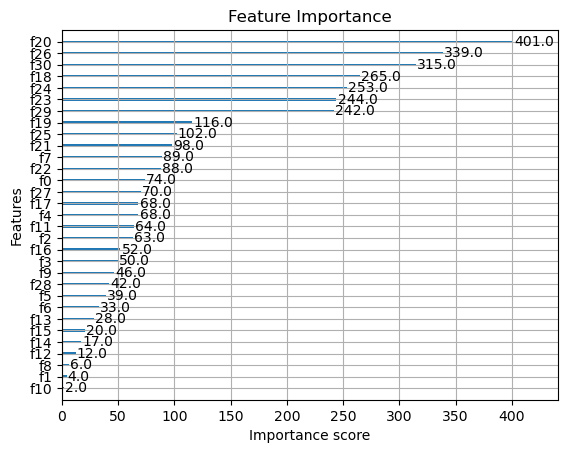

In [27]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Suppose your XGBClassifier is already trained as 'model'
plt.figure(figsize=(10,6))
plot_importance(model, importance_type='weight')  # or 'gain', 'cover'
plt.title("Feature Importance")
plt.show()
